In [9]:
# Importing dependencies

import requests
import json
from config import key_movies
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint


In [10]:
# Run a test api request

url = 'https://api.tvmaze.com/shows'
response_json = requests.get(url).json()
pprint(response_json[0])

{'_links': {'previousepisode': {'href': 'https://api.tvmaze.com/episodes/185054',
                                'name': 'The Enemy Within'},
            'self': {'href': 'https://api.tvmaze.com/shows/1'}},
 'averageRuntime': 60,
 'dvdCountry': None,
 'ended': '2015-09-10',
 'externals': {'imdb': 'tt1553656', 'thetvdb': 264492, 'tvrage': 25988},
 'genres': ['Drama', 'Science-Fiction', 'Thriller'],
 'id': 1,
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/81/202627.jpg',
           'original': 'https://static.tvmaze.com/uploads/images/original_untouched/81/202627.jpg'},
 'language': 'English',
 'name': 'Under the Dome',
 'network': {'country': {'code': 'US',
                         'name': 'United States',
                         'timezone': 'America/New_York'},
             'id': 2,
             'name': 'CBS',
             'officialSite': 'https://www.cbs.com/'},
 'officialSite': 'http://www.cbs.com/shows/under-the-dome/',
 'premiered': '2013-06-24',
 

In [3]:
# Extracting different data from the web 

language = []
runtime = []
average = []
country_code = []
for i in range(len(response_json)):
    try:
        language.append(response_json[i]['language'])
    except NameError:
        language.append('NA')
    try:
        runtime.append(response_json[i]['runtime'])
    except ValueError:
        runtime.append(0)
    try:
        average.append(response_json[i]['rating']['average'])
    except ValueError:
        average.append(0)
    try:
        country_code.append(response_json[i]['network']['country']['code'])
    except TypeError:
        country_code.append('NA')

In [4]:
# Creating a DataFrame for the data extracted for further Analysis

df = pd.DataFrame({'Language':language,'Run Time':runtime,'Rating':average,'Country Code':country_code})
df.head()

,Language,Run Time,Rating,Country Code
0,English,60.0,6.5,US
1,English,60.0,8.8,US
2,English,60.0,7.4,CA
3,English,60.0,7.4,US
4,English,60.0,8.2,US


In [5]:
# Checking for missing values

df.isna().sum()

# Relacing the na values with 0

df.fillna(0)

,Language,Run Time,Rating,Country Code
0,English,60.0,6.5,US
1,English,60.0,8.8,US
2,English,60.0,7.4,CA
3,English,60.0,7.4,US
4,English,60.0,8.2,US
...,...,...,...,...
235,English,30.0,0.0,US
236,English,60.0,0.0,GB
237,English,30.0,7.2,US
238,English,60.0,7.3,DE


In [6]:
# Get the avg rating for each country in the data set

df_by_country = df.groupby('Country Code')['Rating'].mean().reset_index()
df_by_country

,Country Code,Rating
0,CA,7.966667
1,DE,7.300000
2,FR,7.600000
3,GB,7.866667
4,JP,7.950000
5,NA,7.660000
6,US,7.576303


In [7]:
# Create a DF copy 

df_by_country_copy = df_by_country.copy()
df_by_country_copy.set_index('Country Code',inplace=True)
df_by_country_copy

,Rating
Country Code,
CA,7.966667
DE,7.300000
FR,7.600000
GB,7.866667
JP,7.950000
NA,7.660000
US,7.576303


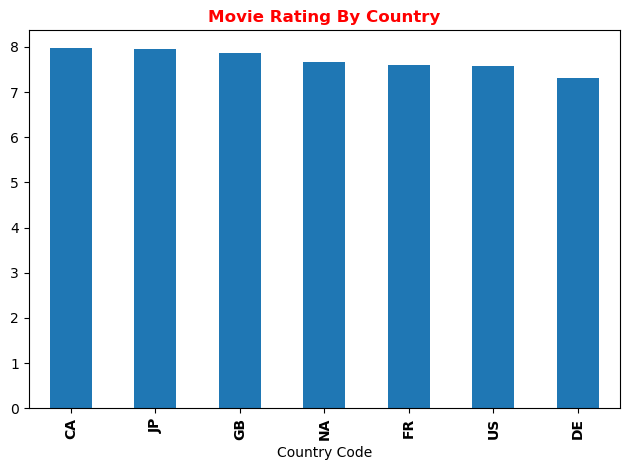

In [8]:
# Visualize the findings
df_by_country_copy = df_by_country_copy.sort_values(by='Rating',ascending=False)
df_by_country_copy.plot(kind='bar',legend=False)
plt.title('Movie Rating By Country',fontweight='bold',color='r')
plt.xticks(fontweight='bold')
plt.tight_layout()
plt.show()